In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy import stats

In [61]:
def clean_data(data):
    data = data.replace([np.inf, -np.inf], np.nan)

    data.fillna(method='ffill', inplace=True)
    # change the datatype Time stapme to datetime
    data = data[(data['GHI'] >= 0) & (data['DNI'] >= 0) & (data['DHI'] >= 0)]

    if 'Timestamp' in data.columns:
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
        most_common_date = (
            data['Timestamp'].mode()[0] if not data['Timestamp'].mode().empty else pd.Timestamp.now()
        )
        data['Timestamp'] = data['Timestamp'].fillna(most_common_date)
        data.set_index('Timestamp', drop=False, inplace=True)
    
    data.drop_duplicates(inplace=True)
    
    return data


In [62]:
def summery(data):
    return data.describe(include='all')

In [63]:
def data_quality_check(data):
    print(data.isnull().sum())
    negative_values = data[(data['GHI'] < 0) | (data['DNI'] < 0) | (data['DHI'] < 0)]
    print(negative_values)
    

In [64]:
def correlation(data):
    # Heatmap for correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
    # Pair plot
    sns.pairplot(data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']])
    plt.show()

In [65]:
def wind_analysis(data, location_name):
    wind_variables = ['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[wind_variables])
    plt.title(f"Wind Speed and Direction for {location_name}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

In [ ]:
def temperature_analysis(data, location_name):
    temperature_variables = ['TModA', 'TModB', 'TModC']
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[temperature_variables])
    plt.title(f"Temperature for {location_name}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

In [ ]:
def histogram(data, location_name):
    histogram_variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
    for var in histogram_variables:
        plt.figure(figsize=(12, 6))
        sns.histplot(data[var], kde=True)
        plt.title(f"Histogram of {var} for {location_name}")
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.show()

In [ ]:
def z_score(data):
    data['z_GHI'] = stats.zscore(data['GHI'])
    data['z_DNI'] = stats.zscore(data['DNI'])
    data['z_outliers'] = data[(abs(data['z_GHI']) > 3) | (abs(data['z_DNI']) > 3)]

In [ ]:
def bubble_chart(data):
    plt.figure(figsize=(10, 8))
    plt.scatter(data['GHI'], data['Tamb'], s=data['RH'], alpha=0.5)
    plt.title('GHI vs Tamb with RH as Bubble Size')
    plt.xlabel('GHI')
    plt.ylabel('Tamb')
    plt.show()

In [66]:
def eda(data, location_name):
    data = clean_data(data)
    
    print(summery(data))

    # check data quality
    data_quality_check(data)


    # plot the data
    plt.figure(figsize=(14, 7))
    data[['GHI', 'DNI', 'DHI', 'Tamb']].plot()
    plt.title('Time Series Analysis')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.show()

    # correlation
    correlation(data)

    # wind analysis
    wind_analysis(data, location_name)

    # temperature analysis
    temperature_analysis(data, location_name)

    # histogram
    histogram(data, location_name)

    # z score
    z_score(data)

    # bubble chart
    bubble_chart(data)
    # data clean
    data = clean_data(data)

/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_44712/197367984.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_44712/197367984.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


                           Timestamp            GHI            DNI  \
count                         246878  246878.000000  246878.000000   
mean   2022-02-08 16:37:16.496002304     513.411100     356.480524   
min              2021-08-09 06:54:00       0.000000       0.000000   
25%              2021-11-08 14:24:15     239.000000      61.200000   
50%              2022-02-09 13:18:30     520.300000     352.250000   
75%              2022-05-11 15:17:45     790.000000     605.300000   
max              2022-08-08 16:51:00    1413.000000     952.300000   
std                              NaN     304.765569     279.731019   

                 DHI           ModA           ModB           Tamb  \
count  246878.000000  246878.000000  246878.000000  246878.000000   
mean      247.397346     501.775502     485.418619      31.271940   
min         0.000000       0.000000       0.000000      11.000000   
25%       141.200000     218.800000     211.800000      27.700000   
50%       227.800000    

<Figure size 1400x700 with 0 Axes>

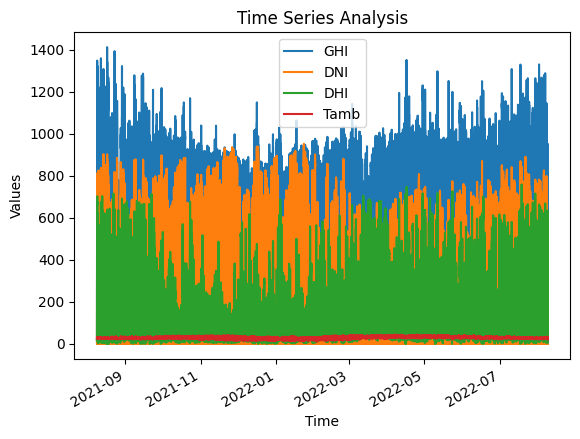

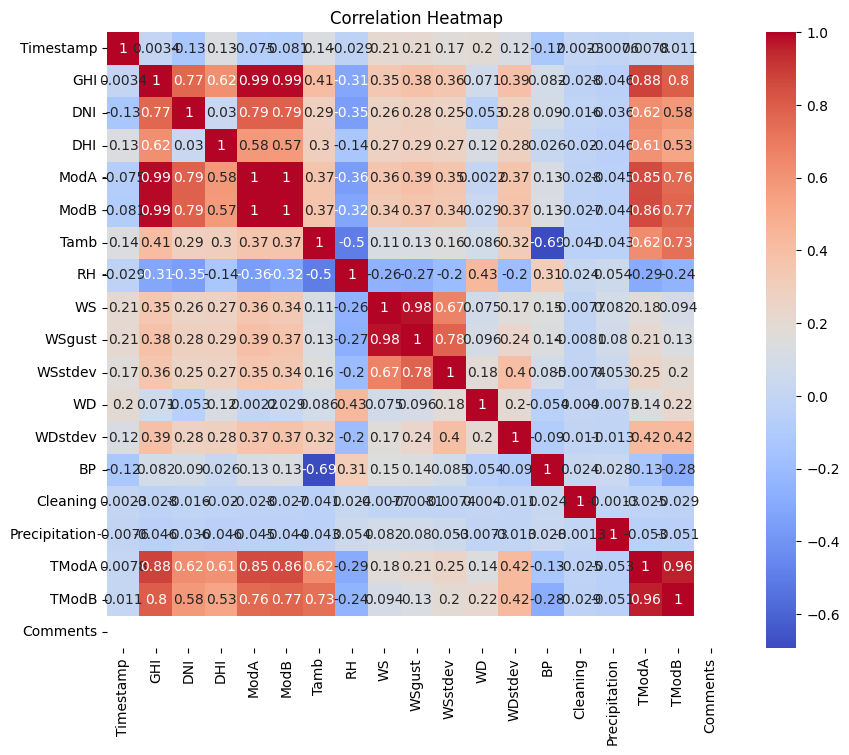

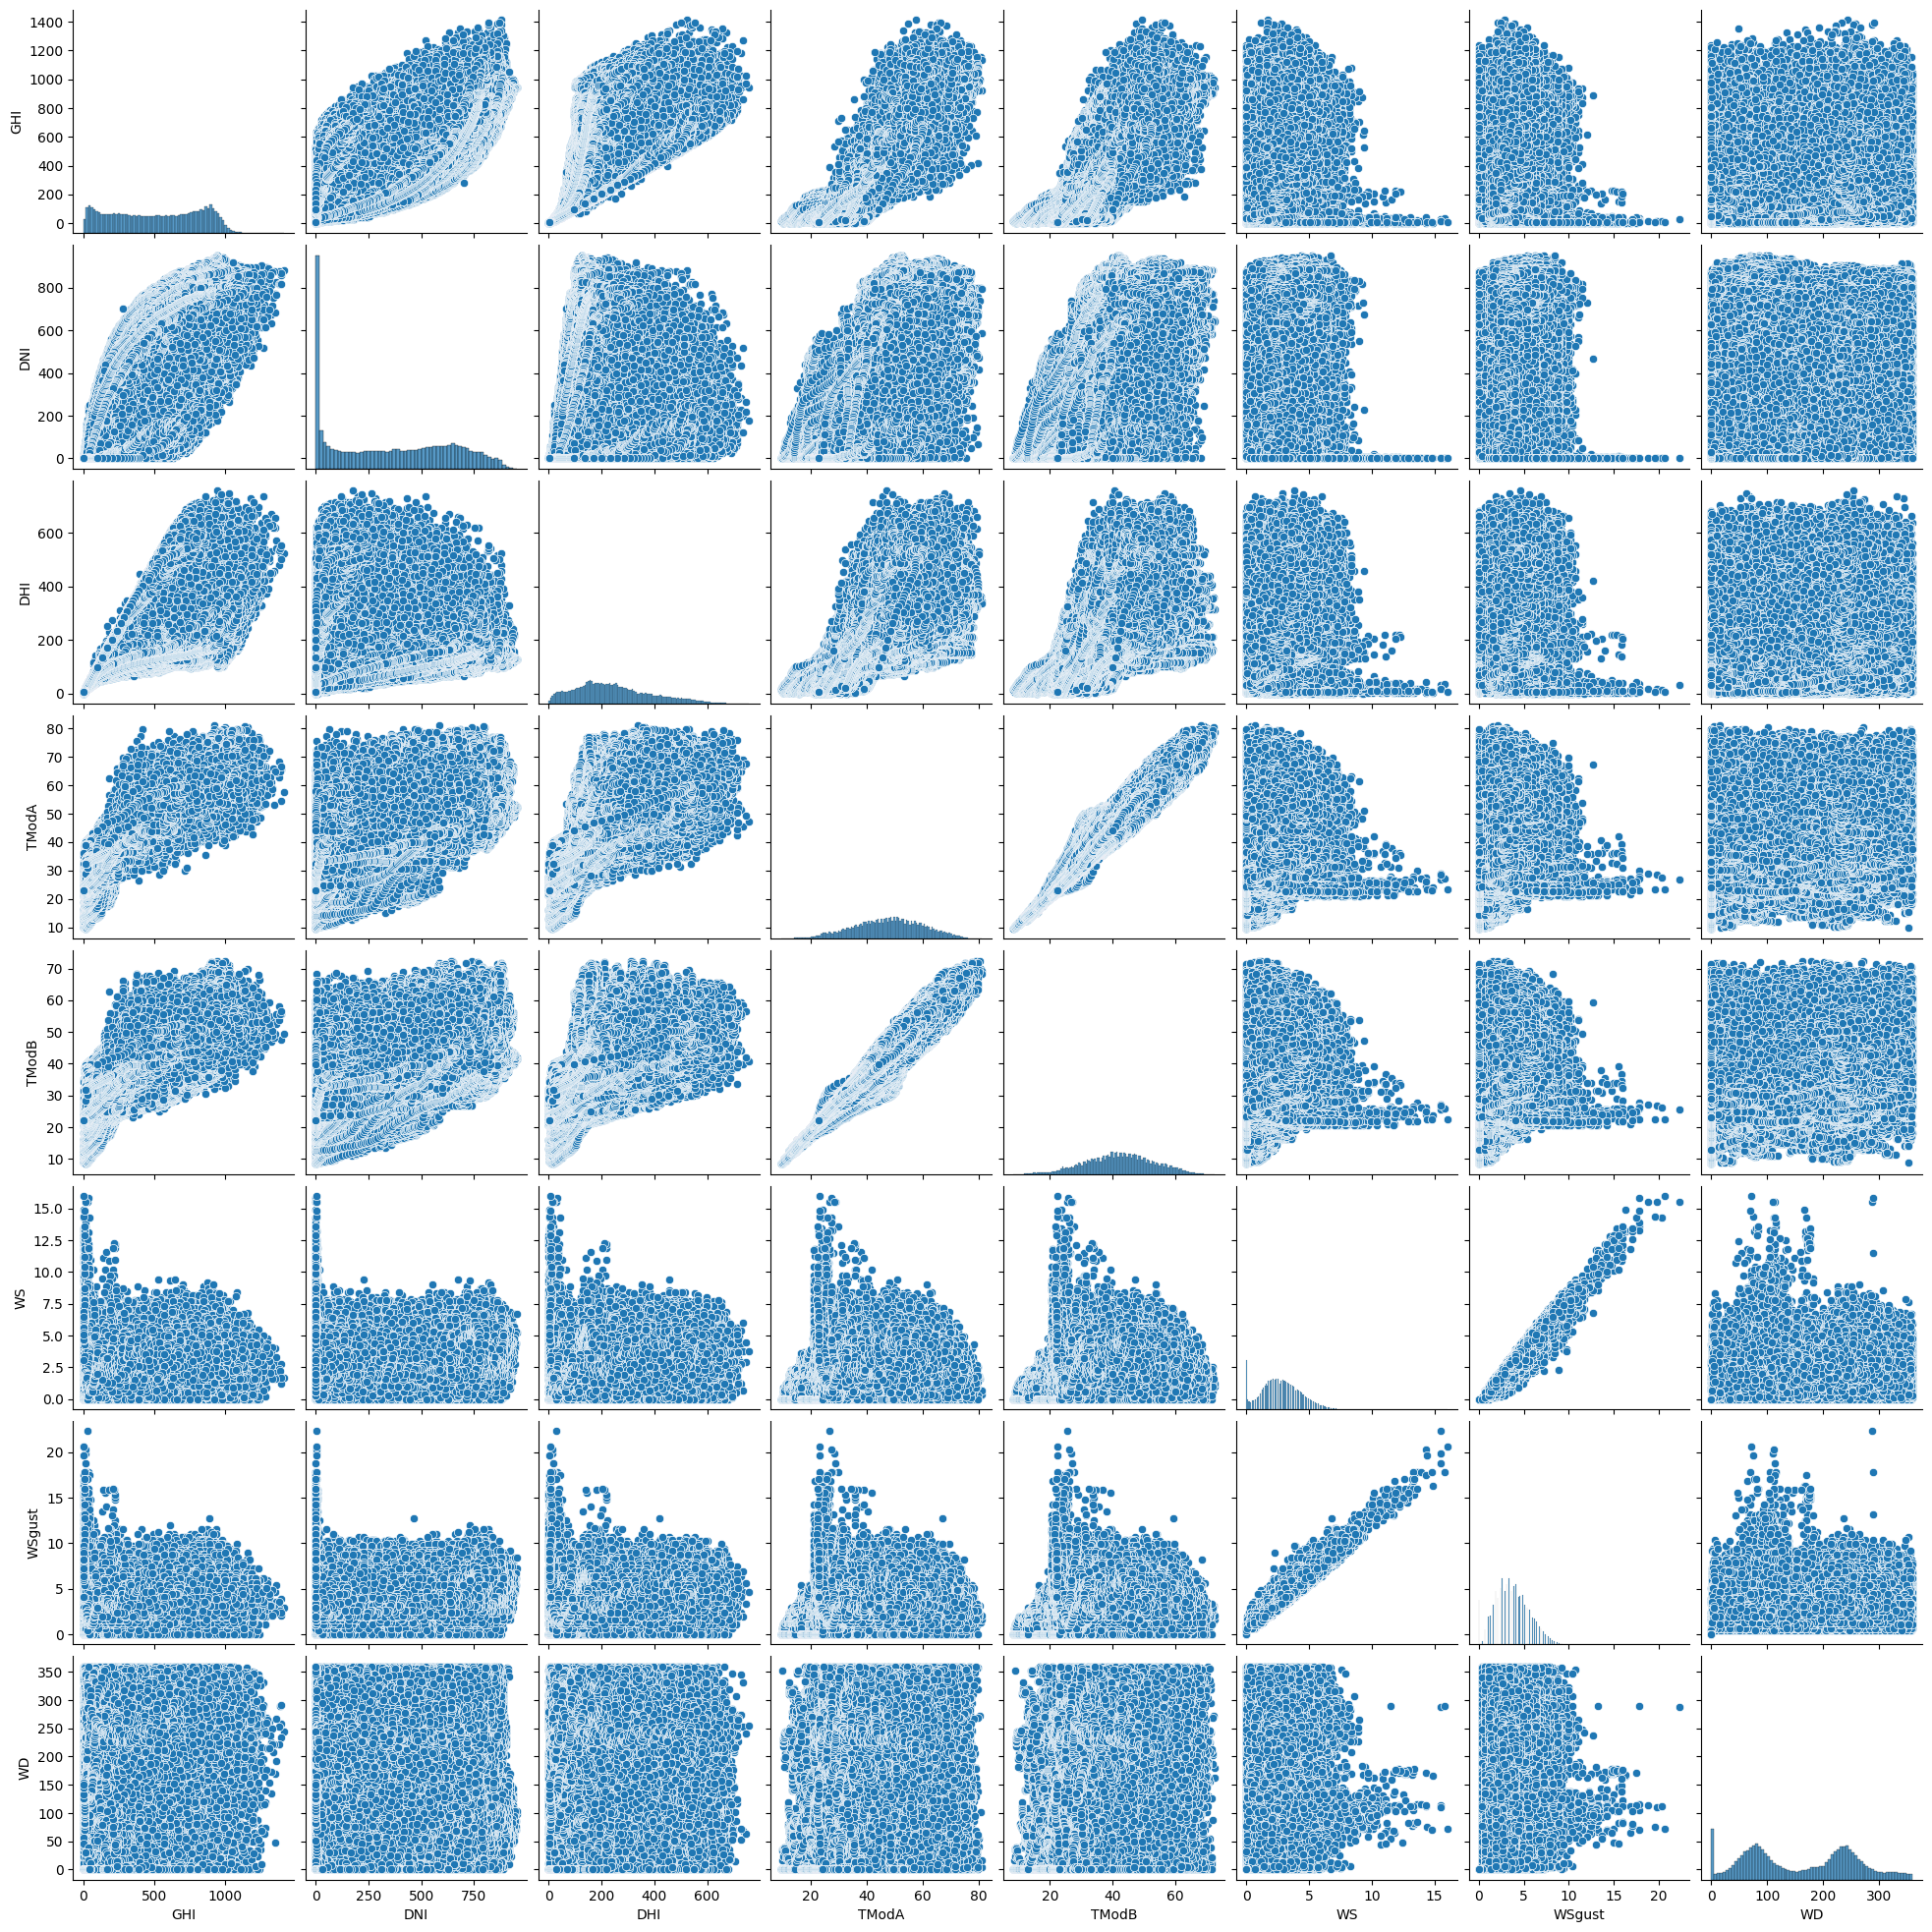

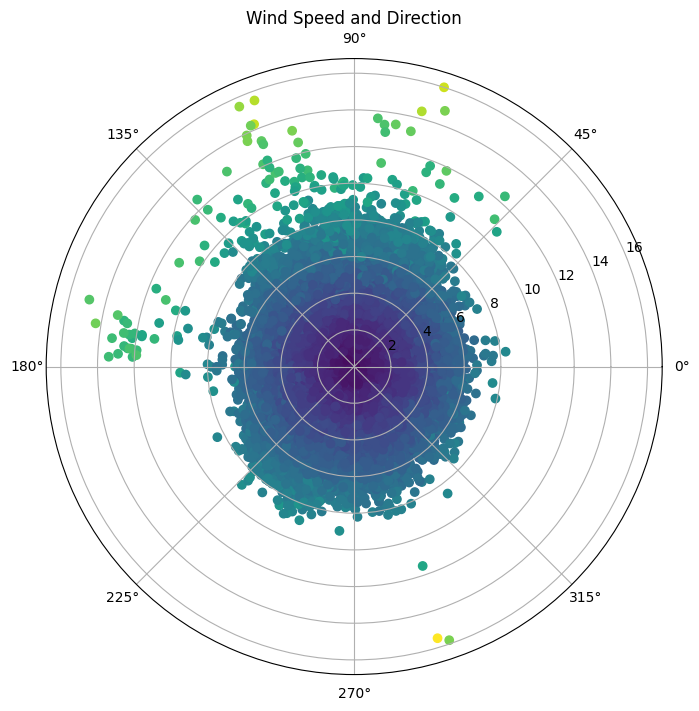

In [67]:
data = pd.read_csv('../../data/benin-malanville.csv')
data = clean_data(data)
# print(summery(data))
eda(data, 'Benin Malanville')

data = pd.read_csv('../../data/sierraleone-bumbuna.csv')

data = clean_data(data)
eda(data, 'Sierra Leone Bumbuna')

data = pd.read_csv('../../data/togo-dapaong_qc.csv')

data = clean_data(data)
eda(data, 'Togo Dapaong')
